<h1>visualization using matplotlib and seaborn<h1>

<h2>Normal visualizatio</h2>

<h3>Step 1: Load dataset </h3>

In [29]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

tips = sns.load_dataset("tips")
tips.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<h3>step 2: prepare the data</h3>

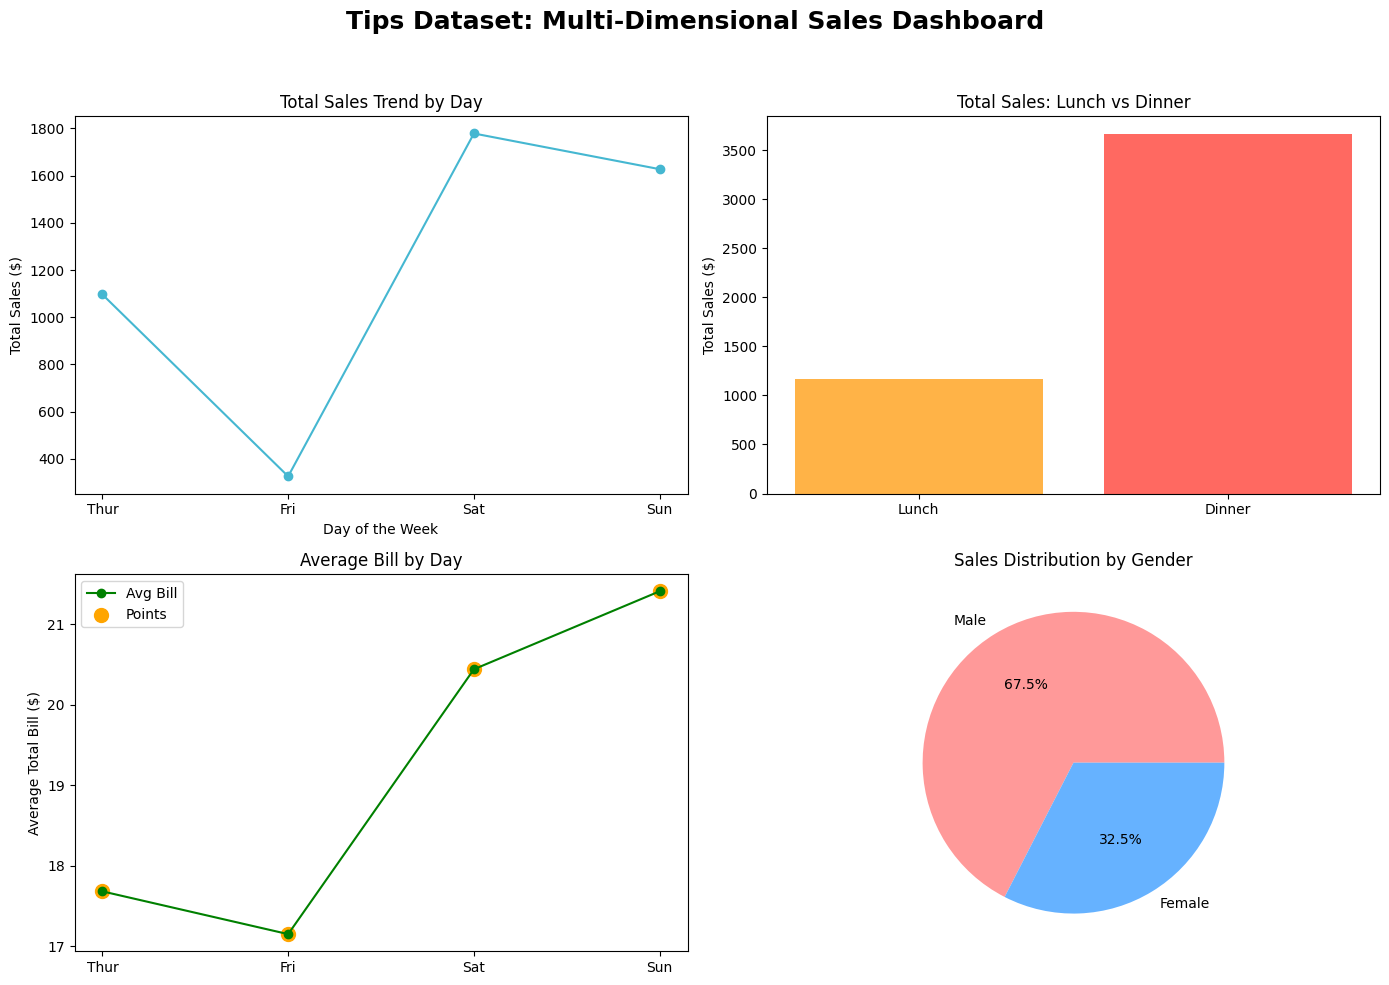

In [34]:

daily_sales = tips.groupby('day', observed=False)['total_bill'].sum().reindex(['Thur','Fri','Sat','Sun'])
time_sales = tips.groupby('time', observed=False)['total_bill'].sum()
avg_bill = tips.groupby('day', observed=False)['total_bill'].mean().reindex(['Thur','Fri','Sat','Sun'])
category_sales = tips.groupby('sex', observed=False)['total_bill'].sum()


fig, axes = plt.subplots(2, 2, figsize=(14,10))
fig.suptitle('Tips Dataset: Multi-Dimensional Sales Dashboard', fontsize=18, fontweight='bold')


axes[0,0].plot(daily_sales.index, daily_sales.values, marker='o', color='#45B7D1')
axes[0,0].set_title('Total Sales Trend by Day')
axes[0,0].set_xlabel('Day of the Week')
axes[0,0].set_ylabel('Total Sales ($)')

axes[0,1].bar(time_sales.index, time_sales.values, color=['#FFB347','#FF6961'])
axes[0,1].set_title('Total Sales: Lunch vs Dinner')
axes[0,1].set_ylabel('Total Sales ($)')

axes[1,0].plot(avg_bill.index, avg_bill.values, marker='o', linestyle='-', color='green', label='Avg Bill')
axes[1,0].scatter(avg_bill.index, avg_bill.values, color='orange', s=100, label='Points')
axes[1,0].set_title('Average Bill by Day')
axes[1,0].set_ylabel('Average Total Bill ($)')
axes[1,0].legend()

axes[1,1].pie(category_sales.values, labels=category_sales.index, autopct='%1.1f%%', colors=['#FF9999','#66B2FF'])
axes[1,1].set_title('Sales Distribution by Gender')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

<h2>Statistical Analysis Visualization</h2>

In [31]:
penguins = sns.load_dataset("penguins")
penguins = penguins.dropna()   # remove missing values
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


IndexError: index 2 is out of bounds for axis 1 with size 2

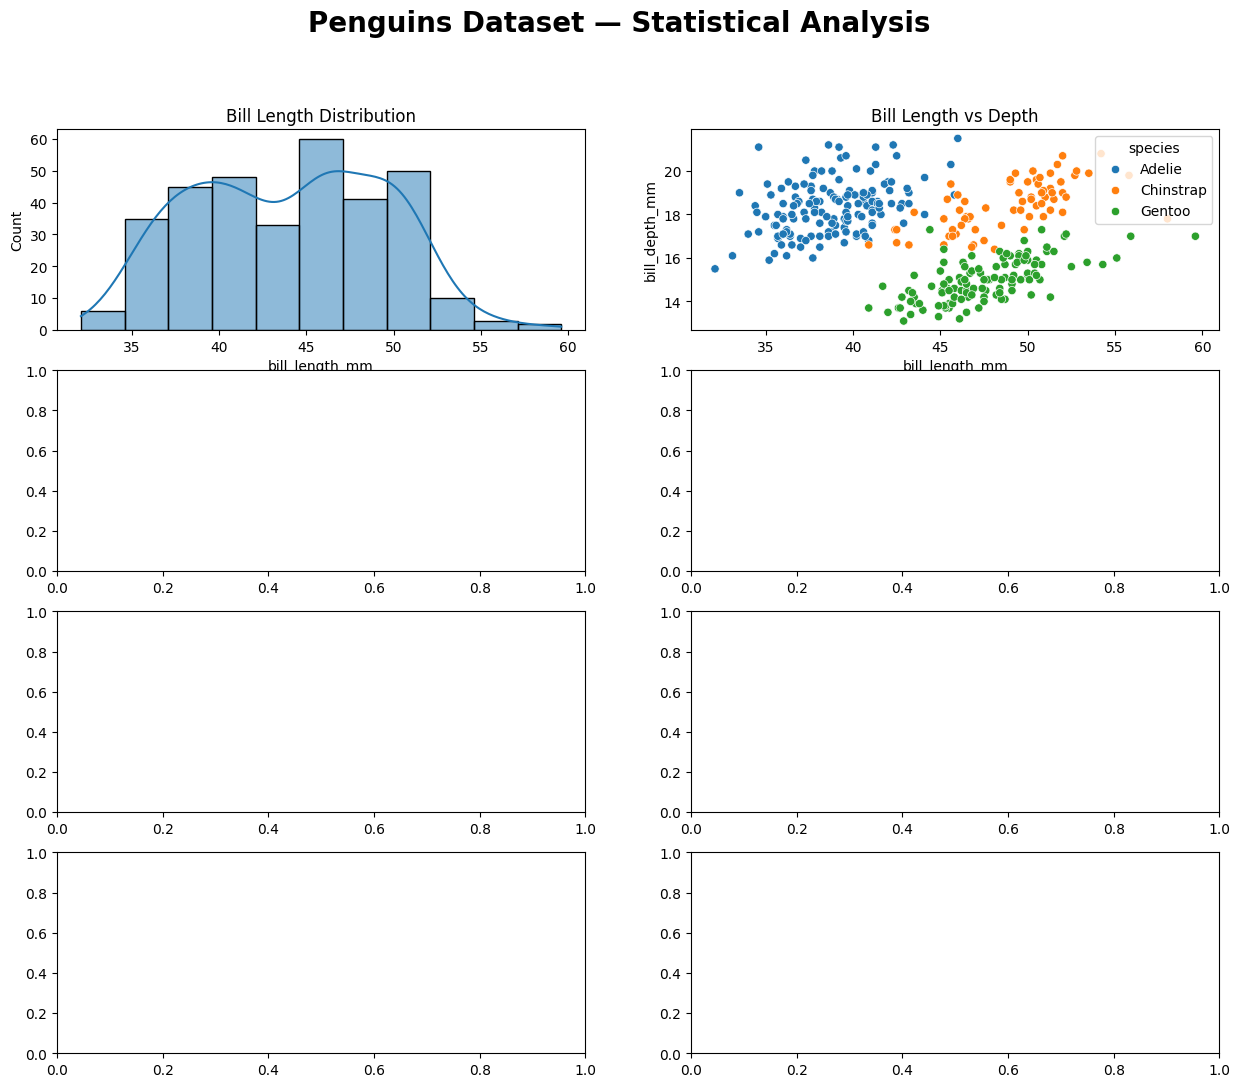

In [ ]:
fig, axes = plt.subplots(4, 2, figsize=(15, 16))
fig.suptitle("Penguins Dataset — Statistical Analysis", fontsize=20, fontweight="bold")

# Row 1
sns.histplot(data=penguins, x="bill_length_mm", kde=True, ax=axes[0,0])
axes[0,0].set_title("Bill Length Distribution")

sns.scatterplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", hue="species", ax=axes[0,1])
axes[0,1].set_title("Bill Length vs Depth")

# Row 2
sns.boxplot(data=penguins, x="species", y="body_mass_g", ax=axes[1,0])
axes[1,0].set_title("Body Mass by Species")

sns.violinplot(data=penguins, x="species", y="bill_length_mm", ax=axes[1,1])
axes[1,1].set_title("Bill Length Distribution by Species")

# Row 3
sns.kdeplot(data=penguins, x="bill_length_mm", y="body_mass_g", ax=axes[2,0])
axes[2,0].set_title("KDE: Body Mass vs Bill Length")

sns.regplot(data=penguins, x="bill_depth_mm", y="body_mass_g", ax=axes[2,1])
axes[2,1].set_title("Regression Plot")

# Row 4
sns.histplot(data=penguins, x="body_mass_g", kde=True, ax=axes[3,0])
axes[3,0].set_title("Body Mass Distribution")

sns.scatterplot(data=penguins, x="flipper_length_mm", y="body_mass_g", hue="species", ax=axes[3,1])
axes[3,1].set_title("Flipper vs Body Mass")

plt.tight_layout()
plt.show()
